### Telecom_Churn Data Part2

* 필요한 라이브러리 불러오기 : numpy, pandas, matplotlib, seaborn

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
sns.set()


* telecom_churn.csv 파일 읽어오기

In [2]:
path="telecom_churn.csv"
df=pd.read_csv(path)

df.head()

,State,Account length,Area code,International plan,Voice mail plan,Number vmail messages,Total day minutes,Total day calls,Total day charge,Total eve minutes,Total eve calls,Total eve charge,Total night minutes,Total night calls,Total night charge,Total intl minutes,Total intl calls,Total intl charge,Customer service calls,Churn
0,KS,128,415,No,Yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,No,Yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,No,No,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,Yes,No,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,Yes,No,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


* Total day minutes / Total intl calls에 대한 히스토 그램을 그리시오 : 1판에 2개를 한 번에 그리세요!!

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217EE740F08>,
      dtype=object)

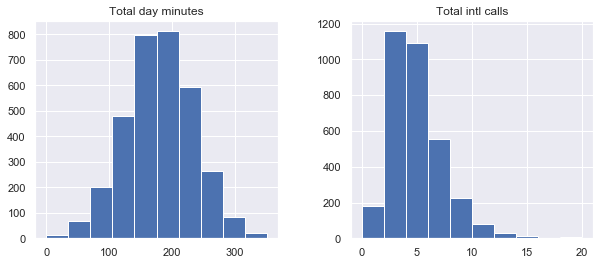

In [3]:
features=["Total day minutes","Total intl calls"]
df[features].hist(figsize=(10,4))

* 위의 그래프에 대한 밀도함수로 그래프 그리기

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x00000217EEFCFF88>,
      dtype=object)

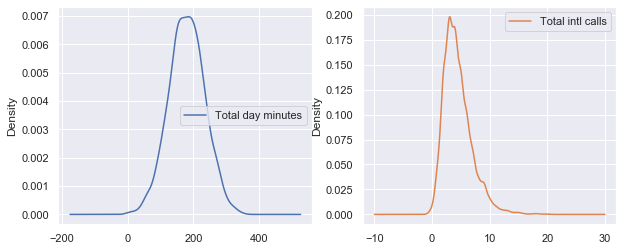

In [4]:
df[features].plot(kind="density", subplots=True, layout=(1,2),sharex=False,
                  figsize=(10,4))

* toal intl calls 에 관련된 히스토그램과 밀도함수를 동시에 나타내시오.

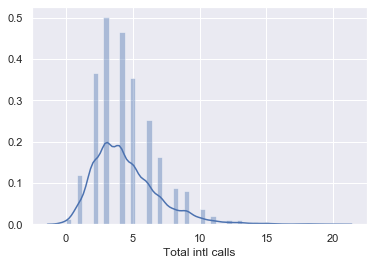

In [5]:
sns.distplot(df["Total intl calls"])

* Total intl calls에 대한 박스플롯을 생성하시오!!

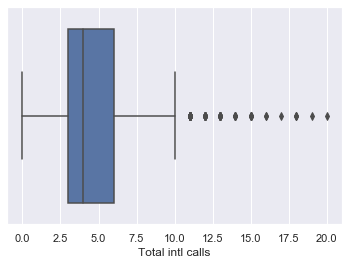

In [6]:
sns.boxplot(x="Total intl calls",data=df)

* Total intl calls 에 대한 boxplot와 violinplot 를 모두 생성하시오!!

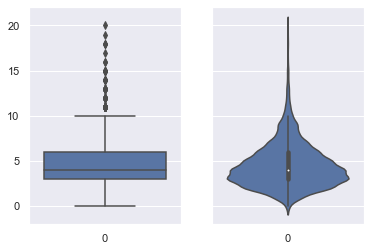

In [7]:
fig, axes = plt.subplots(1,2,sharey=True, figsize=(6,4))
sns.boxplot(data=df["Total intl calls"], ax=axes[0])
sns.violinplot(data=df["Total intl calls"], ax=axes[1])

* feature에 관련된 기본적인 통계 정보를 확인하시오!!!

In [8]:
df[features].describe()

,Total day minutes,Total intl calls
count,3333.000000,3333.000000
mean,179.775098,4.479448
std,54.467389,2.461214
min,0.000000,0.000000
25%,143.700000,3.000000
50%,179.400000,4.000000
75%,216.400000,6.000000
max,350.800000,20.000000


* churn의 컬럼의 값이 종류별로 몇 가지가 있는지 확인!

In [9]:
df["Churn"].value_counts()

False    2850
True      483
Name: Churn, dtype: int64

In [10]:
df["Churn"].value_counts()[0]

2850

In [11]:
df["Churn"].value_counts()[1]

483

* 위의 count관련된 부분에 대한 그래프를 그리시오..대상은 churn/customer service calls

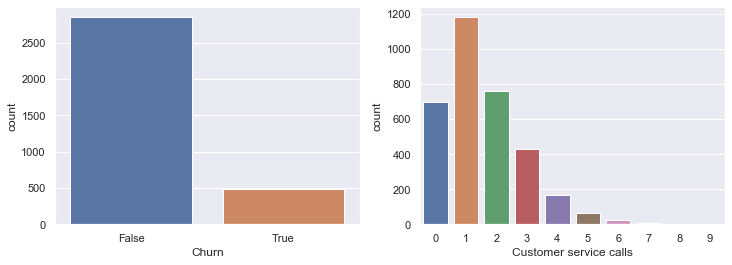

In [12]:
fig, axes = plt.subplots(nrows=1,ncols=2,figsize=(12,4))

sns.countplot(x="Churn",data=df, ax=axes[0])
sns.countplot(x="Customer service calls", data=df, ax=axes[1])

* 수치 데이터 컬럼들을 리스트로 만들고, 이들에 대한 것들을 바탕으로 상관계수/히트맵을 완성하시오!!

In [13]:
[1,2,3,4,5]+[3,4,5]

[1, 2, 3, 4, 5, 3, 4, 5]

In [14]:
#리스트에서는 더하기는 되도, 빼기는 안됨
[1,2,3,4,5]-[3,4,5]

TypeError: unsupported operand type(s) for -: 'list' and 'list'

set(전체컬럼리스트)-set(숫자가 아닌 컬럼 리스트)=set(수치형 컬럼들만...)

In [15]:
set([1,2,3,4,5])

{1, 2, 3, 4, 5}

In [16]:
set([3,4,5])

{3, 4, 5}

In [17]:
set([1,2,3,4,5])-set([3,4,5])

{1, 2}

In [18]:
numerical=list(set(df.columns)-set(["State","International plan","Voice mail plan","Area code","Churn","Customer service calls"]))

In [19]:
df[numerical].corr()

,Total eve charge,Number vmail messages,Account length,Total intl calls,Total night charge,Total intl minutes,Total eve minutes,Total day calls,Total night minutes,Total eve calls,Total day charge,Total intl charge,Total night calls,Total day minutes
Total eve charge,1.000000,0.017578,-0.006745,0.002541,-0.012601,-0.011043,1.000000,-0.021449,-0.012592,-0.011423,0.007036,-0.011074,0.007596,0.007029
Number vmail messages,0.017578,1.000000,-0.004628,0.013957,0.007663,0.002856,0.017562,-0.009548,0.007681,-0.005864,0.000776,0.002884,0.007123,0.000778
Account length,-0.006745,-0.004628,1.000000,0.020661,-0.008960,0.009514,-0.006757,0.038470,-0.008955,0.019260,0.006214,0.009546,-0.013176,0.006216
Total intl calls,0.002541,0.013957,0.020661,1.000000,-0.012329,0.032304,0.002541,0.004574,-0.012353,0.017434,0.008032,0.032372,0.000305,0.008033
Total night charge,-0.012601,0.007663,-0.008960,-0.012329,1.000000,-0.015214,-0.012593,0.022927,0.999999,-0.002056,0.004301,-0.015186,0.011188,0.004300
Total intl minutes,-0.011043,0.002856,0.009514,0.032304,-0.015214,1.000000,-0.011035,0.021565,-0.015207,0.008703,-0.010157,0.999993,-0.013605,-0.010155
Total eve minutes,1.000000,0.017562,-0.006757,0.002541,-0.012593,-0.011035,1.000000,-0.021451,-0.012584,-0.011430,0.007050,-0.011067,0.007586,0.007043
Total day calls,-0.021449,-0.009548,0.038470,0.004574,0.022927,0.021565,-0.021451,1.000000,0.022938,0.006462,0.006753,0.021666,-0.019557,0.006750
Total night minutes,-0.012592,0.007681,-0.008955,-0.012353,0.999999,-0.015207,-0.012584,0.022938,1.000000,-0.002093,0.004324,-0.015180,0.011204,0.004323
Total eve calls,-0.011423,-0.005864,0.019260,0.017434,-0.002056,0.008703,-0.011430,0.006462,-0.002093,1.000000,0.015769,0.008674,0.007710,0.015769


In [67]:
numerical

['Total night calls',
 'Total intl minutes',
 'Total night charge',
 'Total intl calls',
 'Total eve calls',
 'Total eve minutes',
 'Total intl charge',
 'Total day charge',
 'Total day minutes',
 'Account length',
 'Total eve charge',
 'Number vmail messages',
 'Total night minutes',
 'Total day calls']

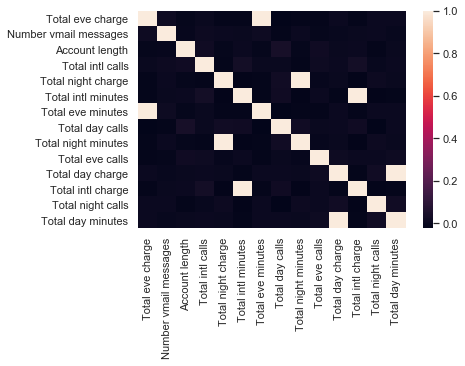

In [20]:
corr_mat=df[numerical].corr()
sns.heatmap(corr_mat)

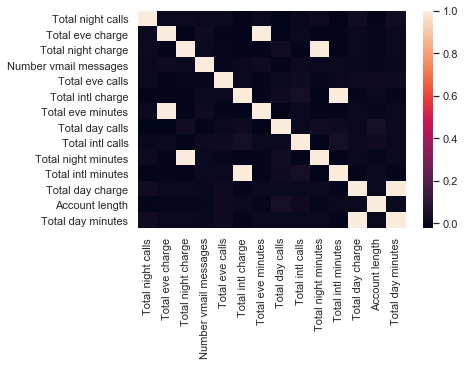

In [19]:
# 전체에서 수치 컬럼이 아닌 것들을 선정해서 제거하기!!!!


# Calculate and plot


* numerical 에서 기존의 모든 수치 중에서 charge 관련된 부분들을 모두 제거할 것!!!

In [21]:
numerical = list(set(numerical) - set(['Total day charge', 'Total eve charge', 'Total night charge', 'Total intl charge']))

* Total day minutes / Total night minutes 간의 스캐터 그래프를 그리시오!!

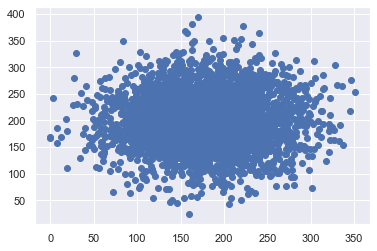

In [22]:
plt.scatter(df["Total day minutes"],df["Total night minutes"])

* 위의 그래프를 스캐터로 그리고, 그 옆에 밀도 함수 그래프가지 같이 나타내시오!!!

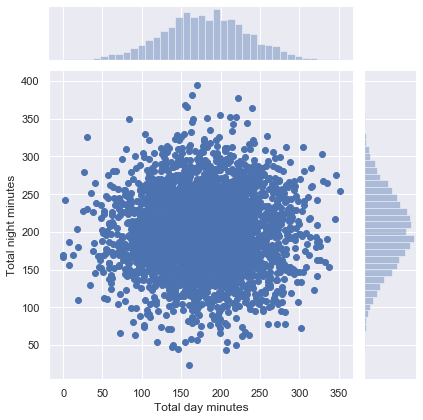

In [23]:
sns.jointplot(x="Total day minutes",y="Total night minutes",data=df,kind="scatter")

* 위의 그래프에 대한 색을 변경해보자!!

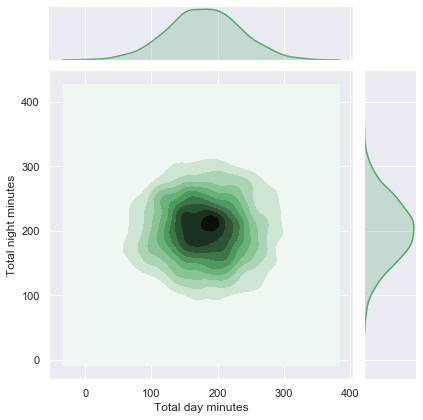

In [24]:
sns.jointplot(x="Total day minutes",y="Total night minutes",data=df,kind="kde",color="g")

* 앞에서 조정한 모든 수치변수들의 모든 값들에 대한 pairplot를 그려보자!!!!

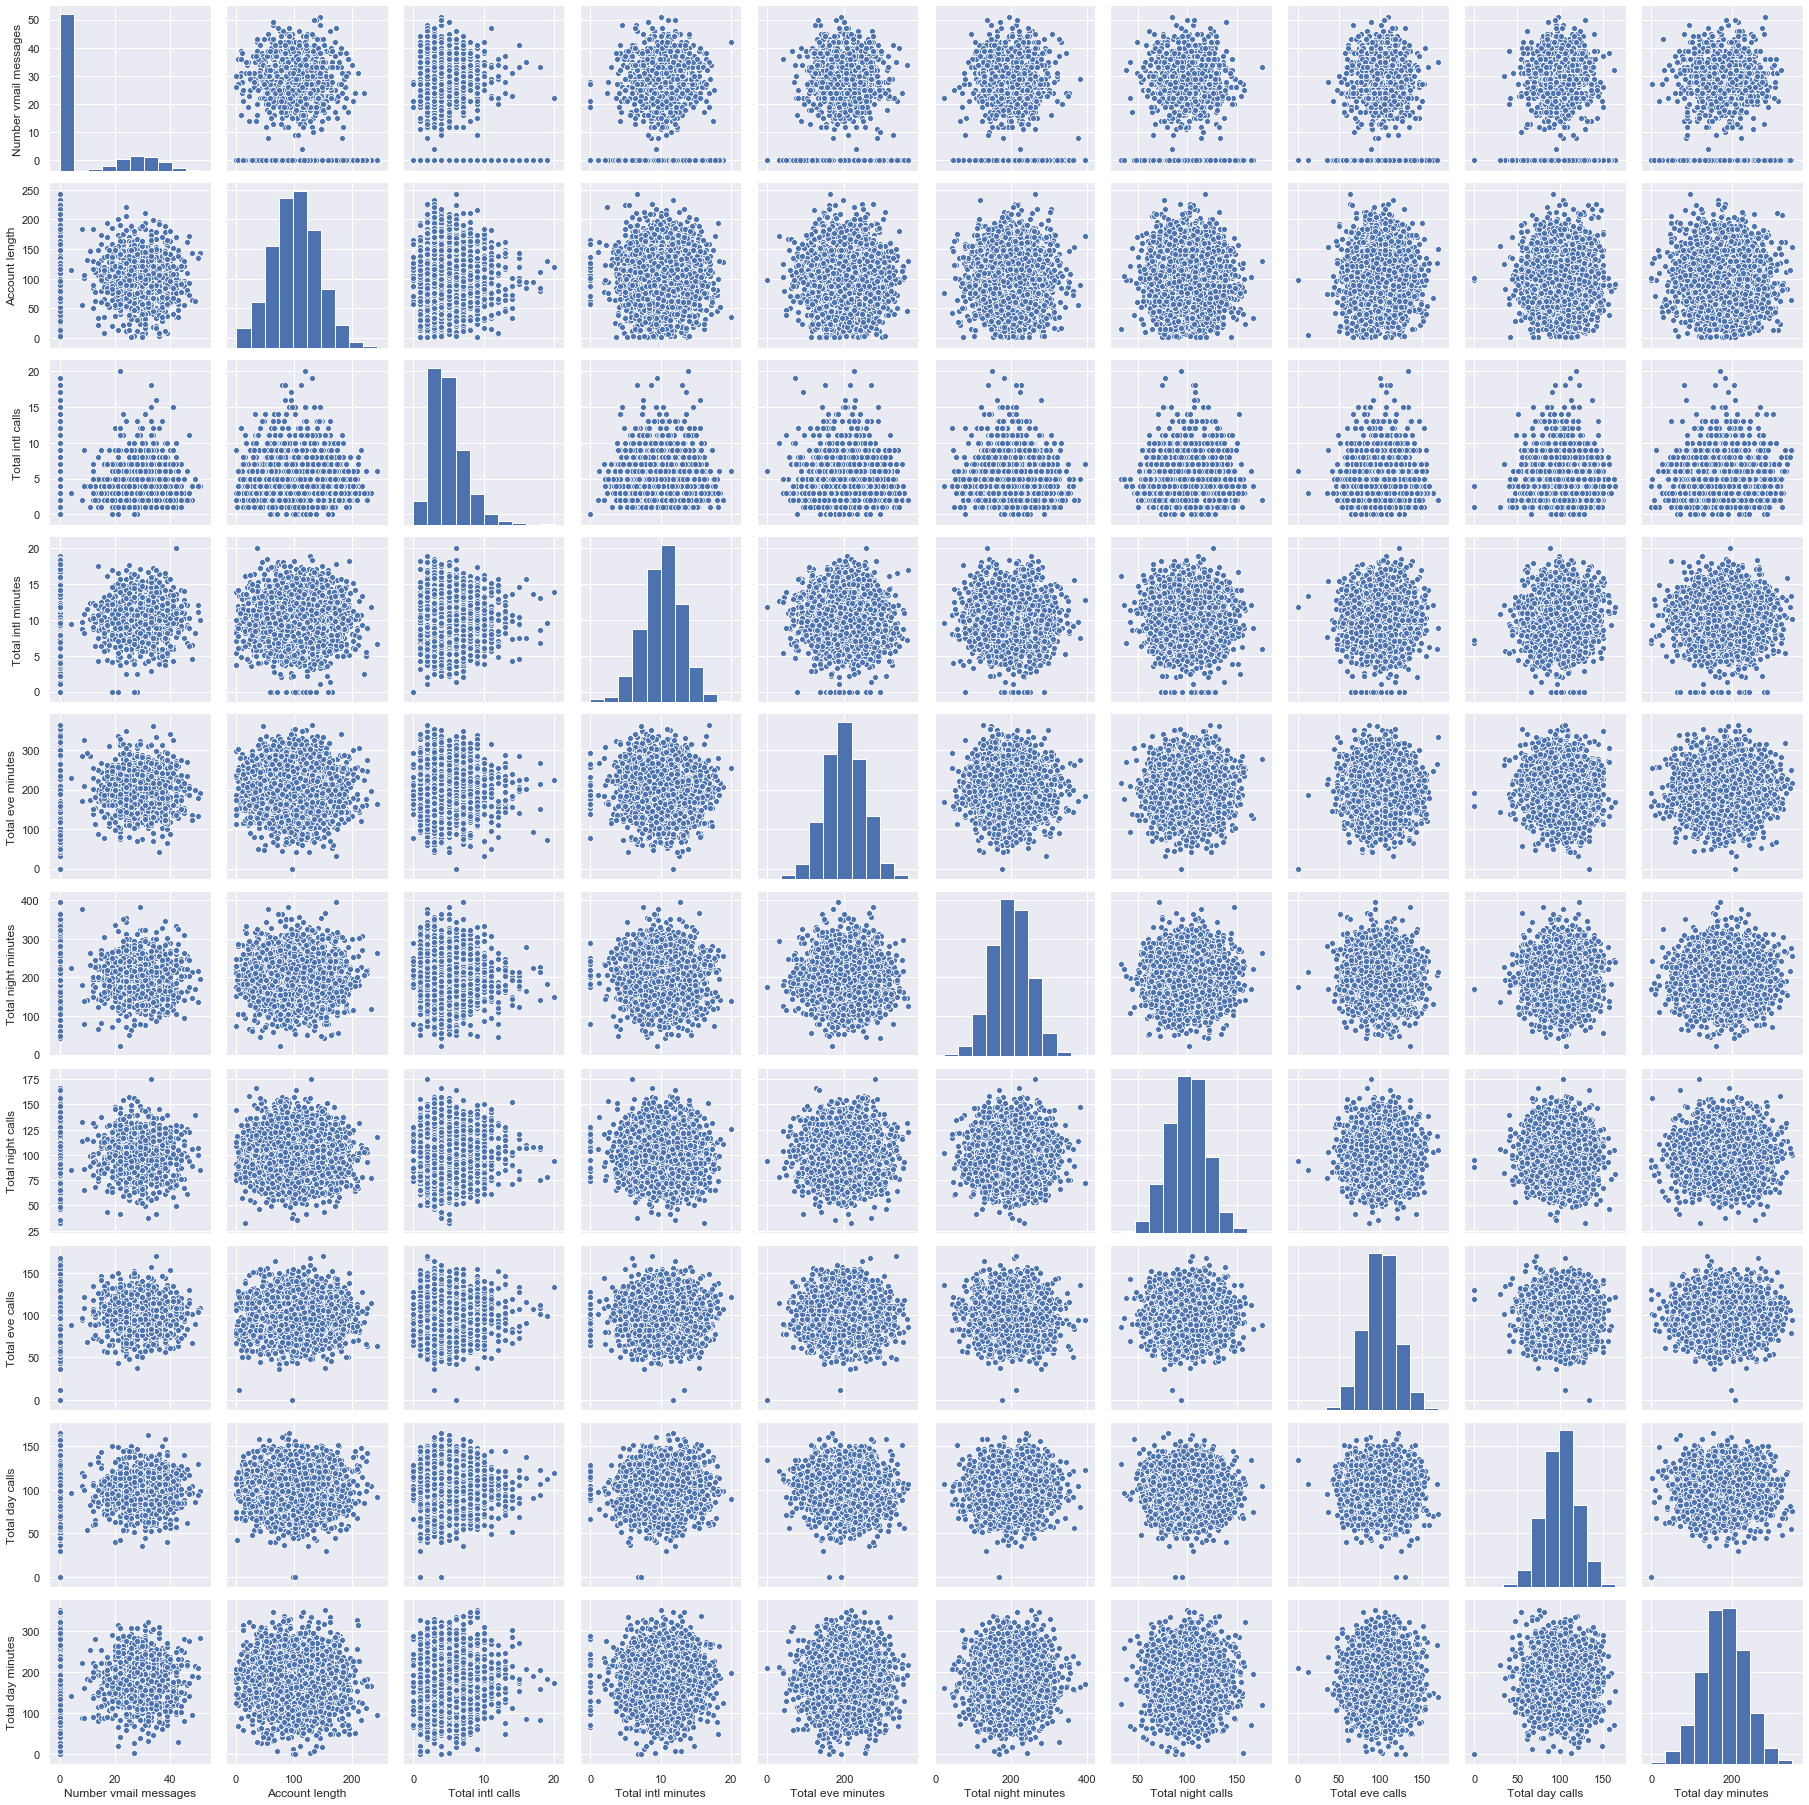

In [25]:
sns.pairplot(df[numerical])

* 위의 스캐터 그래프이지만, 카테고리 변수의 값에 대한 것들로 구별하면서 보고 싶을때..

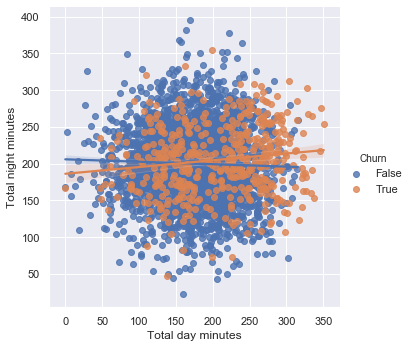

In [48]:
sns.lmplot("Total day minutes","Total night minutes", data=df, hue="Churn",fit_reg=True)

* 기존의 numerical 컬럼에다사 customer service calls를 추가를 하고, 해당하는 numerical 변수와 churn의 값에 대한 boxplot를 그려보시오!

In [49]:
numerical

['Total night calls',
 'Total intl minutes',
 'Total night charge',
 'Total intl calls',
 'Total eve calls',
 'Total eve minutes',
 'Total intl charge',
 'Total day charge',
 'Total day minutes',
 'Account length',
 'Total eve charge',
 'Number vmail messages',
 'Total night minutes',
 'Total day calls']

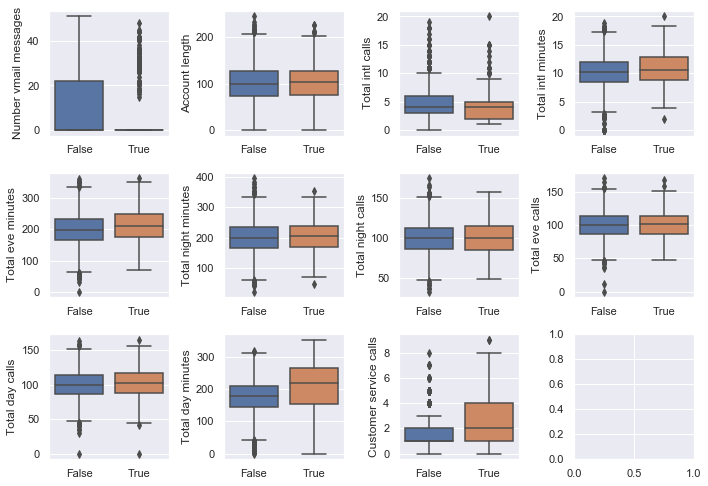

In [26]:
#**************이부분만이라도 꼭 기억! 많이 활용!
numerical.append("Customer service calls") # 14 + 1 = 15

fig, axes = plt.subplots(nrows=3, ncols=4, figsize=(10,7))

for idx, feat in enumerate(numerical):
    ax= axes[int(idx/4),idx%4]
    sns.boxplot(x="Churn",y=feat, data=df, ax=ax)
    ax.set_xlabel('')
    ax.set_ylabel(feat)
fig.tight_layout()

* 서브플롯을 이용하여서 2개의 그래프를 그리는데, 1개는 boxplot/ 1개는 violinplot를 그리시오. 가로 : Churn, 세로 : Total day minutes

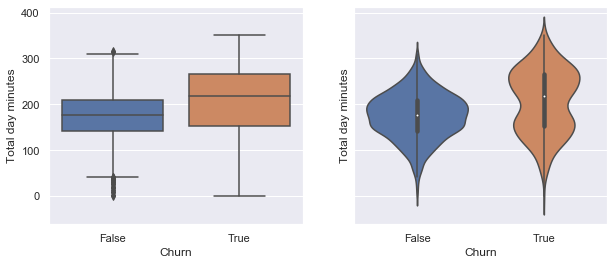

In [27]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.boxplot(x='Churn', y='Total day minutes', data=df, ax=axes[0]);
sns.violinplot(x='Churn', y='Total day minutes', data=df, ax=axes[1]);

* 아래의 그래프와 같이 나타내시오!!!

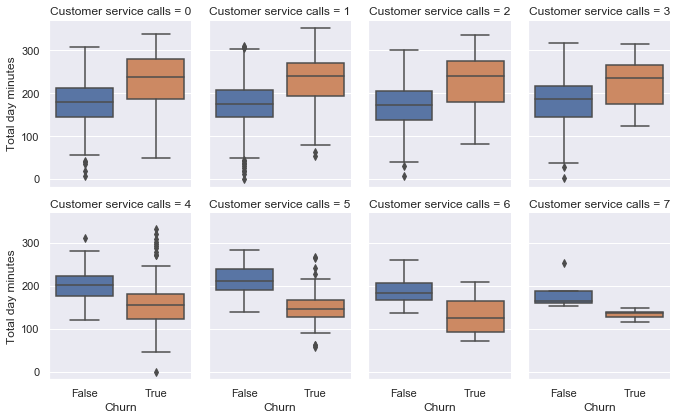

In [28]:
#data에 대한 DF를 지정하는 부분에 있어서
#불리언 인덱싱을 활용하여 data를 선택해서 그릴 수 있다는 점
sns.catplot(x='Churn', y='Total day minutes',col='Customer service calls',
           data=df[df['Customer service calls']<8],kind="box",
           col_wrap=4, height=3, aspect=.8)

* Customer service calls에 대한 값을 countplot을 그리는데, churn의 값을 기준으로 모두 보고싶을때..

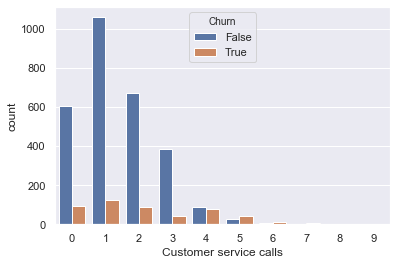

In [55]:
sns.countplot(x='Customer service calls',hue='Churn',data=df)

* 아래 그림과 같이 churn의 값에 따른 countplot를 생성하시오!!!

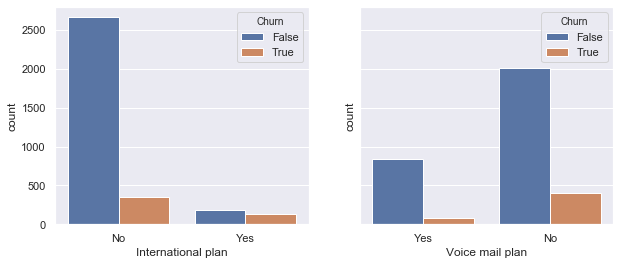

In [29]:
_, axes = plt.subplots(1, 2, sharey=True, figsize=(10, 4))

sns.countplot(x='International plan', hue='Churn', data=df, ax=axes[0]);
sns.countplot(x='Voice mail plan', hue='Churn', data=df, ax=axes[1]);

* Staes 별로 Churn의 분포를 보고 싶어서 아래와 같이 crosstab을 이용해서 생성하시오!!

In [32]:
pd.crosstab(df['State'], df['Churn']).T

State,AK,AL,AR,AZ,CA,CO,CT,DC,DE,FL,...,SD,TN,TX,UT,VA,VT,WA,WI,WV,WY
Churn,,,,,,,,,,,,,,,,,,,,,
False,49,72,44,60,25,57,62,49,52,55,...,52,48,54,62,72,65,52,71,96,68
True,3,8,11,4,9,9,12,5,9,8,...,8,5,18,10,5,8,14,7,10,9


* 위의 결과를 groupby를 이용해서 하시면서, 평균에 대한 값들로 정리를 하고, 평균값이 높은 순서대로 정리하시오!!!

In [38]:
df.groupby(['State'])['Churn'].agg([np.mean]).sort_values(by='mean', ascending=False).T

,mean
State,
AK,0.057692
AL,0.100000
AR,0.200000
AZ,0.062500
CA,0.264706
CO,0.136364
CT,0.162162
DC,0.092593
DE,0.147541
